# Aula 01: Importando e traduzindo os dados

## Importando os dados

In [1]:
import pandas as pd

In [2]:
arquivo = 'arquivos/tips.csv'
gorjetas= pd.read_csv(arquivo)
gorjetas.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Traduzindo colunas e campos

In [3]:
nomes_colunas = {
    'total_bill': 'valor_da_conta',
    'tip': 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia_da_semana',
    'time': 'hora_do_dia',
    'size': 'total_de_pessoas'
}

gorjetas.rename(columns=nomes_colunas, inplace=True)

In [4]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [5]:
# Campos
campo_sobremesa = {
    'No': 'Não',
    'Yes': 'Sim'
}

campo_dia_da_semana = {
    'Sun': 'Domingo',
    'Sat': 'Sábado',
    'Thur': 'Quinta',
    'Fri': 'Sexta'
}

campo_hora_do_dia = {
    'Dinner': 'Jantar',
    'Lunch': 'Almoço'
}


gorjetas.sobremesa = gorjetas.sobremesa.map(campo_sobremesa)
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(campo_dia_da_semana)
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(campo_hora_do_dia)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Aula 02: Comparando distribuições de maneira exploratória

## Seaborn e scatterplot

In [6]:
import seaborn as sns

In [7]:
# Análise 01 - Valor da conta e gorjeta

In [8]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

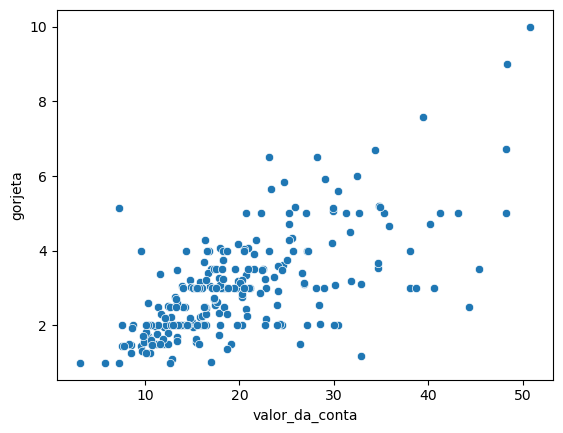

In [50]:
x = 'valor_da_conta'
y = 'gorjeta'
data = gorjetas
valor_gorjeta = sns.scatterplot(x=x, y=y, data=data)
valor_gorjeta = valor_gorjeta.get_figure()

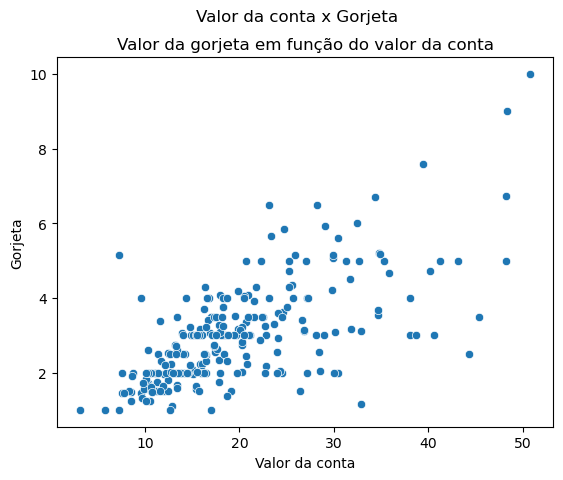

In [82]:
# editando a figura

suptitulo = 'Valor da conta x Gorjeta'
valor_gorjeta.suptitle(suptitulo)

titulo = 'Valor da gorjeta em função do valor da conta'
valor_gorjeta.axes[0].set_title(titulo)

xlabel = 'Valor da conta'
ylabel = 'Gorjeta'
valor_gorjeta.axes[0].set(xlabel=xlabel, ylabel=ylabel)
valor_gorjeta

In [10]:
# Observações
# - Visualmente, o valor da gorjeta aumenta com o valor da conta

In [84]:
valor_gorjeta.savefig('valor_gorjeta.png')

In [11]:
# Verificando se há registros nulos
gorjetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valor_da_conta    244 non-null    float64
 1   gorjeta           244 non-null    float64
 2   sobremesa         244 non-null    object 
 3   dia_da_semana     244 non-null    object 
 4   hora_do_dia       244 non-null    object 
 5   total_de_pessoas  244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


## Coluna porcentagem

In [12]:
# Análise 01 (Pt. 2) - Criando o campo porcentagem
campo_porcentagem = (gorjetas.gorjeta / gorjetas.valor_da_conta) * 100
gorjetas['porcentagem'] = campo_porcentagem.round(2)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


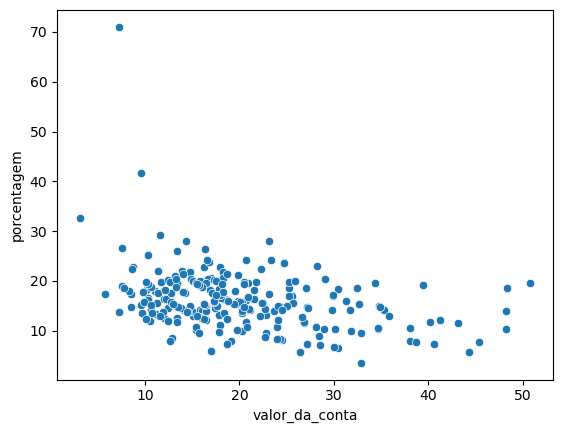

In [13]:
x = gorjetas.valor_da_conta
y = gorjetas.porcentagem
data = gorjetas
porcentagem_conta = sns.scatterplot(x=x, y=y, data=data)

In [14]:
# Observações
# - Visualmente, o valor da conta não é proporcional ao valor da gorjeta

## Relplot e lmplot

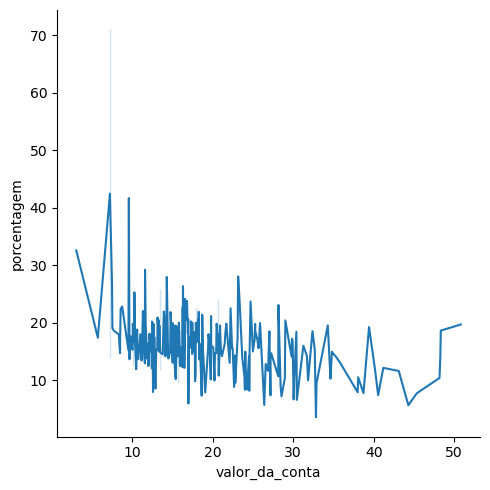

In [15]:
# relplot
x = gorjetas.valor_da_conta
y = gorjetas.porcentagem
data = gorjetas
kind = 'line'
porcentagem_conta_linha = sns.relplot(x=x, y=y, kind=kind, data=data)
porcentagem_conta_linha

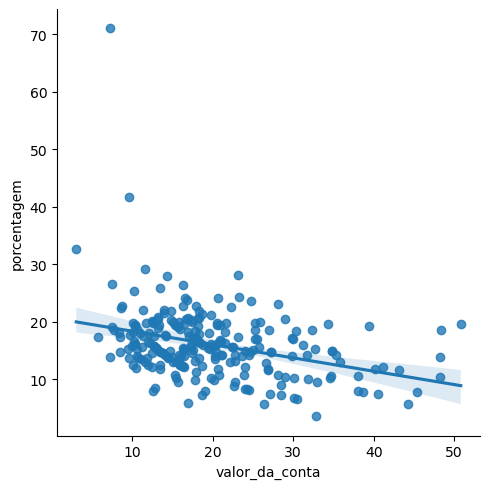

In [16]:
# lmplot
x = 'valor_da_conta'
y = 'porcentagem'
data = gorjetas
porcentagem_conta_lm = sns.lmplot(x=x, y=y, data=data)
porcentagem_conta_lm